<a href="https://colab.research.google.com/github/Rontu22/Artificial-Intelligence-with-Python/blob/master/sna_ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 5 :

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import math
import collections
from csv import reader

# Form the graph

{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 3, 9: 3, 10: 2, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 2, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 1, 24: 1, 25: 1, 26: 3, 27: 1, 28: 1, 29: 3, 30: 3, 31: 1, 32: 3, 33: 3}


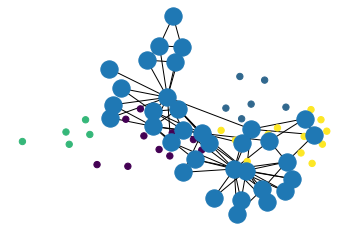

In [ ]:
G = nx.karate_club_graph()   ## THIS GRAPH IS GOING TO BE EVALUATED
# G_Karate = nx.karate_club_graph()
G_CSV_GRAPHS = nx.karate_club_graph() ## USING THIS AS PLACEHOLDER FOR GRAPH
file = 'dolphin.csv'
nodes = []
edge_list = []
with open(file, 'r') as read_obj:
    csv_reader = reader(read_obj)
    count = 0                              ##If csv file has first row Source Destination use count to ignore it 
    for row in csv_reader:
        if count != 0:
            u, v = row
            u = int(u) 
            v = int(v)
            edge_list.append((int(u),int(v)))   ## or use     edge_list.append((int(u)-1,int(v)-1))
        count += 1

# FORM THE GRAPH
# G.add_edges_from(edge_list)

# TAKE THE REQUIRED GRAPH
# G = G_CSV_GRAPHS


#Louvain Partition
partition = community_louvain.best_partition(G)
print(partition)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw(G)
plt.show()

# QUALITY MEASURE

In [ ]:
#Quality Measure
def delta(u,v):
    return matrix[u][v]

In [ ]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 2,
 5: 2,
 6: 2,
 7: 0,
 8: 3,
 9: 3,
 10: 2,
 11: 0,
 12: 0,
 13: 0,
 14: 3,
 15: 3,
 16: 2,
 17: 0,
 18: 3,
 19: 0,
 20: 3,
 21: 0,
 22: 3,
 23: 1,
 24: 1,
 25: 1,
 26: 3,
 27: 1,
 28: 1,
 29: 3,
 30: 3,
 31: 1,
 32: 3,
 33: 3}

In [ ]:
mat = nx.to_numpy_matrix(G)
mat

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
#creating cluster
cluster = [[],[],[],[]]
for i in partition:
    cluster[partition[i]].append(i)
# Clusters and their nodes
var = 1
for i in cluster:
    print("Cluter ",var,"= ",i) 
    var+=1

Cluter  1 =  [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Cluter  2 =  [23, 24, 25, 27, 28, 31]
Cluter  3 =  [4, 5, 6, 10, 16]
Cluter  4 =  [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]


In [ ]:
# Unifiability of cluster C(i) and C(j)

def Unifiability(G,Ci,Cj,mat):

    sum1,sum2,sum3 = 0,0,0

    for i in Ci:
        for j in Cj:
            sum1+=int(mat[[i],[j]])

    for i in Ci:
        for j in G:
            sum2+=int(mat[[i],[j]])
        for j in Cj:
            sum2-=int(mat[[i],[j]])
  
    for i in Cj:
        for j in G:
            sum3+=int(mat[[i],[j]])
        for j in Ci:
            sum3-=int(mat[[i],[j]])

    return sum1/(sum2+sum3-sum1)

In [ ]:
# Unifiability between cluster1 and cluster2
Unifiability(G,cluster[0],cluster[1],mat)

0.04

In [ ]:
#avarage unifiability
def AVU(G,cluster,mat):
  
  # calling Unifiability for all clusters

    sum_unifiability = 0

    for i in cluster:
        for j in cluster:
              if i!=j:
                sum_unifiability += Unifiability(G,i,j,mat)

    return sum_unifiability/len(cluster)

In [ ]:
AVU_G = AVU(G=G,cluster=cluster,mat=mat)

In [ ]:
# AVU of graph G
AVU_G

0.14741413916146298

In [ ]:
# Isolability of cluster C(i)

def Isolability(G,Ci,mat):

    sum1,sum2 = 0,0

    for i in Ci:
        for j in Ci:
            sum1+=int(mat[[i],[j]])

    for i in Ci:
        for j in G:
            if i!=j:
                sum2+=int(mat[[i],[j]])

    return sum1/(sum1+sum2)

In [ ]:
Isolability(G=G,Ci=cluster[0],mat=mat)

0.4339622641509434

In [ ]:
# AVI

def AVI(G,cluster,mat):

    sum = 0
  
    for i in cluster:
        sum += Isolability(G,i,mat)

    return sum/len(cluster)

In [ ]:
AVI_G = AVI(G,cluster,mat)

In [ ]:
# AVI of graph G

AVI_G

0.41488154348134487

In [ ]:
# AUI 

def AUI(G,cluster,mat):
    avi = AVI(G,cluster,mat)
    avu = AVU(G=G,cluster=cluster,mat=mat)
    return (2*avi)/(1+avu*avi)

In [ ]:
AUI_G = AUI(G,cluster,mat)
# AUI of graph G

AUI_G

0.7819400955168019

In [ ]:
# ANUI

def ANUI(G,cluster,mat):
      return AUI(G,cluster,mat)/2

In [ ]:
ANUI_G = ANUI(G,cluster,mat)
# ANUI of graph G

ANUI_G

0.39097004775840094

In [ ]:
Modularity_G = nx.algorithms.community.quality.modularity(G,communities=cluster)
# Quality measure using Modularity from networkx library of graph G

Modularity_G

0.41978961209730437

In [ ]:
#accuracy  measures
# original mapping of graph G
truelabel = {0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

In [ ]:
## F-measure
## f-measure  = truepositive/(truepositive + 1/2(falsepositive + falsenegative))

def fmeasure(truelabel,predlabel,G,true,false,ptrue,pfalse):
  
  # truepositive
    tp = 0.0
    for i in G:
        if predlabel[i] == true:
              if truelabel[i] in ptrue:
                tp+=1

  # falsepositive
    fp = 0.0
    for i in G:
        if predlabel[i] == false:
            if truelabel[i] in pfalse:
                fp+=1

  # falsenegative
    fn = 0.0
    for i in G:
        if predlabel[i] == false:
            if not truelabel[i] in ptrue:
                fn+=1
        
    print("tp=",tp," fp=",fp," fn=",fn)
    print("precision = ", tp/(tp+fp))
    print("recall = ", tp/(tp+fn))

    return tp/(tp + 0.5*(fp+fn))

In [ ]:
fmeasure(truelabel,partition,G,true=1,false=0,ptrue={1,0},pfalse={2,3})

tp= 6.0  fp= 0.0  fn= 0.0
precision =  1.0
recall =  1.0


1.0

In [ ]:
## normalized mutual Information 
## NMI = 2*I(Y;C)/[H(Y)+H(C)]

def NMI(G,truelabel,predlabel,cluster):

  ## Entropy of class label
    prob = {}
    for i in G:
        if truelabel[i] in prob:
            prob[truelabel[i]] += 1.0
        else:
            prob[truelabel[i]] = 0.0

    u = []
    for i in prob:
        u.append(prob[i]/len(G)) 

    hy = 0.0
    for i in u:
        hy += (-i)*(math.log(i,2))

  ## Entropy of cluster label
    prob2 = {}
    for i in G:
        if predlabel[i] in prob2:
               prob2[predlabel[i]] += 1.0
        else:
              prob2[predlabel[i]] = 0.0

    v = []
    for i in prob2:
        v.append(prob2[i]/len(G))


    hc = 0.0
    for i in v:
        hc += (-i)*(math.log(i,2))
  
    print("hy\t:Entropy of class label\t\t\t = ",hy)
    print("hc\t:Entropy of cluster label\t\t = ",hc)

  ## Mutual Information

  
    hyc = 0.0
    for j in cluster:

        p = {}
        p.clear()
        for i in G:
              p[predlabel[i]]=0.0

        for i in j:

            if predlabel[i] == truelabel[i]:
                p[predlabel[i]]+= 1.0


        for i in p:
            p[i]=p[i]/len(j)
    
        temp = 0.0
        for i in p:
            if p[i] != 0:
                hyc -= p[i]*(math.log(p[i],2))

    iyc = hy -hyc
    print("hyc\t:Entropy of class label within cluster\t = ",hyc)
    print("iyc\t:Mutual Information\t\t\t = ",iyc)
    return print("\nNMI  = ",(2*iyc)/(hy+hc))

In [ ]:
NMI(G,truelabel,partition,cluster)

hy	:Entropy of class label			 =  1.023494438823849
hc	:Entropy of cluster label		 =  1.8159181179173376
hyc	:Entropy of class label within cluster	 =  0.0
iyc	:Mutual Information			 =  1.023494438823849

NMI  =  0.7209198511106963


In [ ]:
#ARI
from sklearn.metrics.cluster import adjusted_rand_score
def fun2(d):
    ls = []
    for key, val in d.items():
        ls.append(val)
    return ls
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

y_pred = fun2(partition)
#print(communities)
#print(y_pred)
#print(type(y_pred))

ars_results = adjusted_rand_score(y_true, y_pred)

print("ARI =", ars_results)

ARI = 0.5413568683493947


In [ ]:
def intersection(lst1,lst2):
    temp=set(lst2)
    lst3=[value for value in lst1 if value in temp]
    
    return lst3


In [ ]:
def internal_clustering_coefficient(G,cluster,v):
    nodes=intersection(cluster,nx.neighbors(G,v))
    nodes.append(v);
    H=G.subgraph(nodes)
    internal_CC=nx.clustering(H)
    return internal_CC[v],len(nodes)-1

In [ ]:
C_in={}
I={}
for i in cluster:
    for j in i:
        C_in[j],I[j]=internal_clustering_coefficient(G,i,j)

In [ ]:
D=G.degree()

In [ ]:
def External_conn_max(G,cluster,v):
    max=0
    for i in cluster:
        x=0
        for j in i:
            if(mat[[v],[j]]):
                x=x+1
        if(x>max):
            max=x
    return max

In [ ]:
E_max={}
for i in G:
    E_max[i]=External_conn_max(G,cluster,i)

In [ ]:
#perm
def permanence(I,E,D,c):
    perm={}
    for i in I:
        perm[i]=(I[i]/E[i])*(1/D[i])-(1-c[i])
    return perm

In [ ]:
perm=permanence(I,E_max,D,C_in)

In [ ]:
perm

{0: -0.6486111111111111,
 1: -0.4603174603174603,
 2: 2.7755575615628914e-17,
 3: -0.1666666666666667,
 4: -0.6666666666666667,
 5: -0.41666666666666674,
 6: -0.41666666666666674,
 7: 0.25,
 8: 0.2,
 9: -0.5,
 10: -0.6666666666666667,
 11: 0.0,
 12: 0.5,
 13: 0.2,
 14: 0.5,
 15: 0.5,
 16: 0.5,
 17: 0.5,
 18: 0.5,
 19: 0.3333333333333333,
 20: 0.5,
 21: 0.5,
 22: 0.5,
 23: -0.8666666666666667,
 24: -0.3333333333333334,
 25: -0.3333333333333334,
 26: 0.5,
 27: -0.75,
 28: -0.6666666666666667,
 29: -0.08333333333333337,
 30: 0.25,
 31: -0.5000000000000001,
 32: -0.6666666666666666,
 33: -0.7593582887700534}

# PERMANENCE FOR THE GIVEN INPUT

{0: 2, 1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}


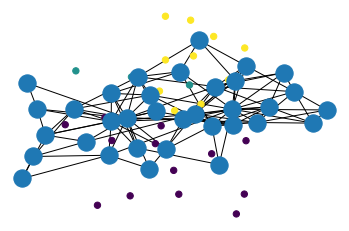

In [ ]:
G = nx.karate_club_graph()
file = '15rw_t06.csv'
nodes = []
edge_list = []
with open(file, 'r') as read_obj:
    csv_reader = reader(read_obj)
    count = 0                              ##If csv file has first row Source Destination use count to ignore it 
    for row in csv_reader:
        if count != 0:
            u, v = row
            u = int(u) 
            v = int(v)
            edge_list.append((int(u),int(v)))   ## or use     edge_list.append((int(u)-1,int(v)-1))
        count += 1

G.add_edges_from(edge_list)
#Louvain Partition
partition = community_louvain.best_partition(G)
print(partition)
# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw(G)
plt.show()

In [ ]:
#creating cluster Louvain
cluster = [[],[],[],[]]
for i in partition:
    cluster[partition[i]].append(i)
# Clusters and their nodes
var = 1
for i in cluster:
    print("Cluter ",var,"= ",i) 
    var+=1

Cluter  1 =  [14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Cluter  2 =  [1, 16, 17, 21]
Cluter  3 =  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Cluter  4 =  []


In [ ]:
#One given in the 15rw_comm_t06.txt file
cluster = [[1, 2, 3, 4, 5, 6, 7, 8, 9],[10, 11, 12, 13],[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]

var = 1
for i in cluster:
    print("Cluster ",var,"= ",i) 
    var+=1


Cluster  1 =  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Cluster  2 =  [10, 11, 12, 13]
Cluster  3 =  [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
#Adjacency Matrix    
mat = np.zeros(shape=(G.number_of_nodes(),G.number_of_nodes()))
for i in range (0,G.number_of_nodes()):
    for j in range (0,G.number_of_nodes()):
        if(G.has_edge(i,j)):
            mat[i][j]=1  

In [ ]:
def intersection(lst1,lst2):
    temp=set(lst2)
    lst3=[value for value in lst1 if value in temp]
    
    return lst3

def internal_clustering_coefficient(G,cluster,v):
    nodes=intersection(cluster,nx.neighbors(G,v))
    nodes.append(v);
    H=G.subgraph(nodes)
    internal_CC=nx.clustering(H)
    return internal_CC[v],len(nodes)-1
C_in={}
I={}
for i in cluster:
    for j in i:
        C_in[j],I[j]=internal_clustering_coefficient(G,i,j)
D=G.degree()
#print(D)
def External_conn_max(G,cluster,v):
    max=0
    for i in cluster:
        x=0
        for j in i:
            if(mat[[v],[j]]==1):
                x=x+1
        if(x>max):
            max=x
    return max
E_max={}
for i in G:
    E_max[i]=External_conn_max(G,cluster,i)
    
#perm
def permanence(I,E,D,c):
    perm={}
    for i in I:
        if(E_max[i]!=0):
            perm[i]=((I[i]/E[i])*(1/D[i]))-(1-c[i])
        elif(D[i]==0 and E_max[i]==0):
            perm[i]=0;
        else:
            perm[i]=1
    return perm


Average Permanance: -0.3129133597883598 

Permanence of Nodes
Node  1   0.1111111111111111
Node  2   -0.39285714285714285
Node  3   -0.375
Node  4   -0.13333333333333336
Node  5   0.16666666666666666
Node  6   -0.3416666666666667
Node  7   -0.2571428571428572
Node  8   -0.04166666666666663
Node  9   -0.35555555555555557
Node  10   0.14285714285714285
Node  11   0.25
Node  12   0.2
Node  13   0.125
Node  14   -0.675
Node  15   -0.75
Node  16   0.25
Node  17   -0.46666666666666673
Node  18   -0.8
Node  19   -0.5000000000000001
Node  20   -0.75
Node  21   -0.6666666666666667
Node  22   -0.6666666666666667
Node  23   -0.8333333333333334
Node  24   -0.75


<BarContainer object of 24 artists>

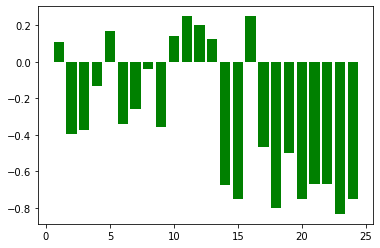

In [ ]:
perm=permanence(I,E_max,D,C_in)
perm=collections.OrderedDict(sorted(perm.items()))

perm_sum= sum(perm.values())
perm_avg= perm_sum/len(perm)
print("Average Permanance: "+str(perm_avg), "\n")
print("Permanence of Nodes")
for i in perm:
    print ("Node ", i , " ", perm[i])
plt.bar(perm.keys(), perm.values(), width=.8, color='g', animated="True")